Heart Attack Analysis based on a dataset

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, preprocessing
from sklearn.metrics import mean_absolute_error

In [34]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [35]:
# Renaming the columns for better understanding
data.rename(columns = {'age':'age', 'sex':'sex', 'cp':'chest_pain', 'trtbps':'resting_bp', 
                                         'chol':'cholestrol', 'fbs':'fasting_blood_sugar', 
                                         'restecg':'resting_ecg_results', 'thalachh':'maxm_heart_rate',
                                         'exng':'exercise_induced_angina', 'oldpeak':'oldpeak', 
                                         'slp':'slp', 'caa':'major_vessels_num', 'thall':'thall', 'output':'heart_attack'}, inplace = True)

In [36]:
data.shape

(303, 14)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain               303 non-null    int64  
 3   resting_bp               303 non-null    int64  
 4   cholestrol               303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   resting_ecg_results      303 non-null    int64  
 7   maxm_heart_rate          303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   oldpeak                  303 non-null    float64
 10  slp                      303 non-null    int64  
 11  major_vessels_num        303 non-null    int64  
 12  thall                    303 non-null    int64  
 13  heart_attack             303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [38]:
data.describe()

,age,sex,chest_pain,resting_bp,cholestrol,fasting_blood_sugar,resting_ecg_results,maxm_heart_rate,exercise_induced_angina,oldpeak,slp,major_vessels_num,thall,heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Exploratory Data Analysis

<Axes: xlabel='heart_attack', ylabel='count'>

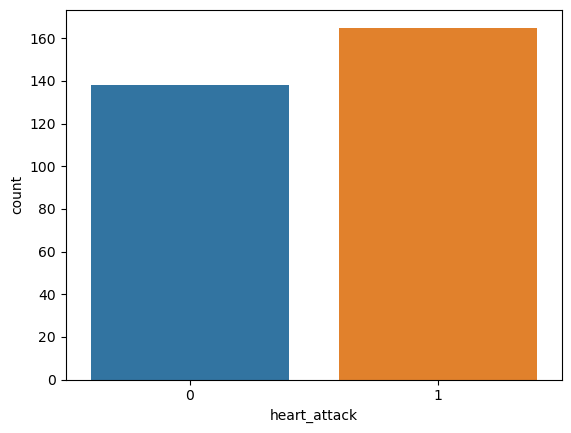

In [39]:
sns.countplot(x = 'heart_attack', data = data)

<Axes: xlabel='sex', ylabel='count'>

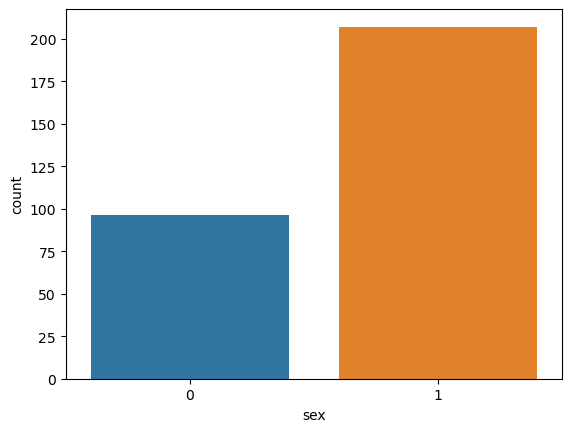

In [40]:
sns.countplot(x = 'sex', data = data)

<Axes: xlabel='age', ylabel='Count'>

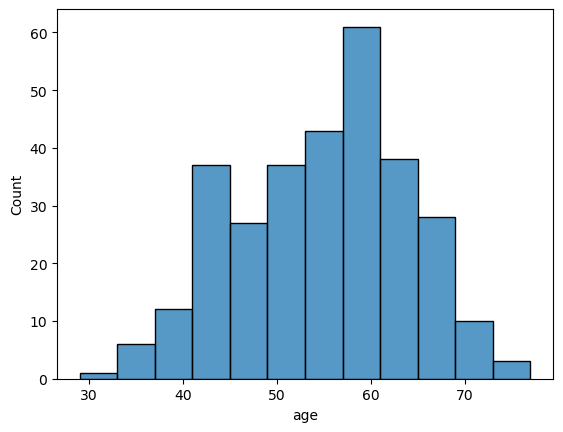

In [41]:
sns.histplot(x = 'age', data = data)

<Axes: >

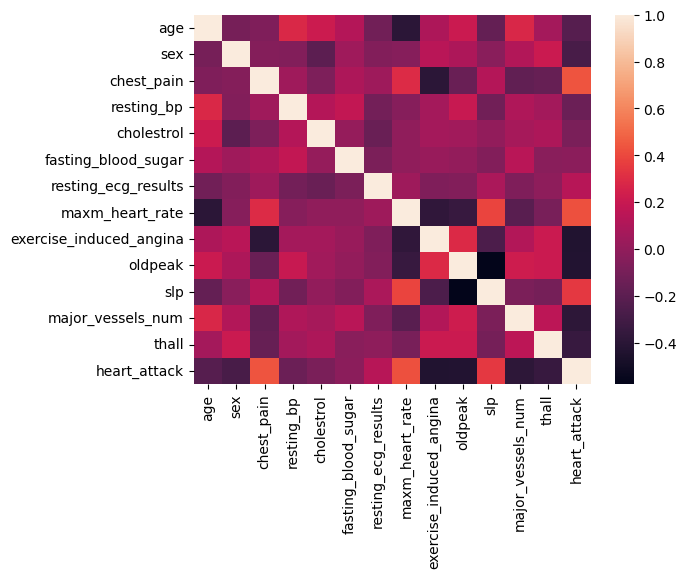

In [42]:
corr = data.corr()
sns.heatmap(corr)

<Axes: xlabel='age', ylabel='heart_attack'>

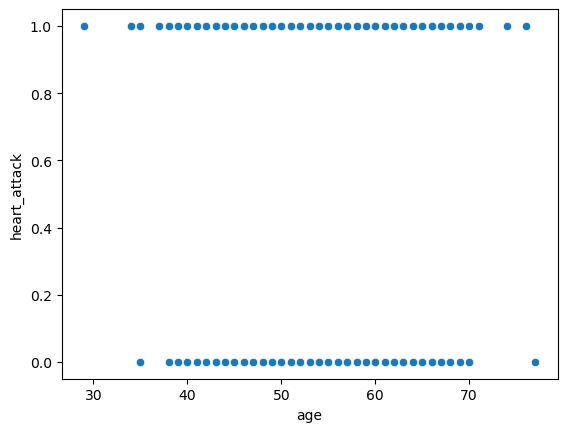

In [43]:
sns.scatterplot(x = 'age', y = 'heart_attack', data = data)

<Axes: xlabel='cholestrol', ylabel='heart_attack'>

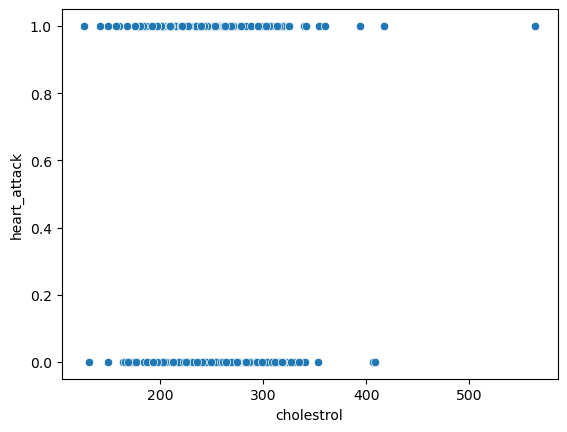

In [44]:
sns.scatterplot(x = 'cholestrol', y = 'heart_attack', data = data )

In [45]:
# Target variable
y = data.heart_attack
y.head()

0    1
1    1
2    1
3    1
4    1
Name: heart_attack, dtype: int64

In [46]:
# Remaining features
x = data.iloc[:, :-1]
x.head()

,age,sex,chest_pain,resting_bp,cholestrol,fasting_blood_sugar,resting_ecg_results,maxm_heart_rate,exercise_induced_angina,oldpeak,slp,major_vessels_num,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [47]:
# Splitting the dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 10)

Classifying using Logistic Regression

In [54]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

C:\Users\neela\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))
print("Recall Score: ", metrics.recall_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Accuracy:  0.7704918032786885
Precision:  0.7
F1 Score:  0.75
Recall Score:  0.8076923076923077
Mean Absolute Error:  0.22950819672131148


Classifying using Random Forest Classifier

In [56]:
model2 = RandomForestClassifier()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [57]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))
print("Recall Score: ", metrics.recall_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Accuracy:  0.7704918032786885
Precision:  0.7
F1 Score:  0.75
Recall Score:  0.8076923076923077
Mean Absolute Error:  0.22950819672131148


Classifying using KNN

In [58]:
model3 = KNeighborsClassifier(n_neighbors = 2)
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [59]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))
print("Recall Score: ", metrics.recall_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Accuracy:  0.6557377049180327
Precision:  0.6190476190476191
F1 Score:  0.5531914893617021
Recall Score:  0.5
Mean Absolute Error:  0.3442622950819672


Classifying using Logistic Regression

In [61]:
model4 = DecisionTreeClassifier()
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [62]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("F1 Score: ", metrics.f1_score(y_test, y_pred))
print("Recall Score: ", metrics.recall_score(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))

Accuracy:  0.7704918032786885
Precision:  0.6875
F1 Score:  0.7586206896551724
Recall Score:  0.8461538461538461
Mean Absolute Error:  0.22950819672131148
